In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [2]:
##Start graph session

sess = tf.Session()

In [24]:
##randomly generate data
m=2
x_vals = np.linspace(0, 10, 100)##100 pts between 0 and 10 
y_vals = m*x_vals + np.random.normal(0, 1, 100)##y_val=m*x_val+noise



In [ ]:
'A linear regression can be written as y=(theta)*x 
"where theta is the parameter matrix whose value is to be found"'


"theta=(t(x)*x)^(-1)*t(x)*y    using normal equation,where t(x is transpose of matrix x)"




In [26]:


x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
x = np.column_stack((x_vals_column, ones_column))


y = np.transpose(np.matrix(y_vals))


In [27]:
x_tensor = tf.constant(x)
y_tensor = tf.constant(y)

In [28]:
##solving normal equation


tx_x = tf.matmul(tf.transpose(x_tensor), x_tensor)
tx_x_inv = tf.matrix_inverse(tx_x)
product = tf.matmul(tx_x_inv, tf.transpose(x_tensor))
solution = tf.matmul(product, y_tensor)

solution_eval = sess.run(solution)

In [29]:
# Extract coefficients
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]

In [30]:
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)##using y=slope*x_val+y_intercept

slope: 2.0123953501
y_intercept: -0.369184191603


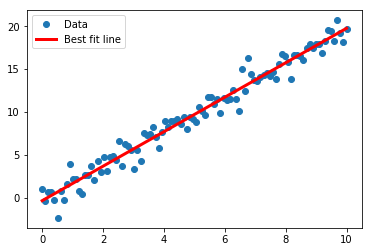

In [31]:
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()